In [174]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import os 
import seaborn as sns

In [175]:
df_train = pd.read_csv('Titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 基本統計量

In [176]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 相関係数

In [178]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# 欠損値の合計

In [179]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

----

# それぞれの可視化

---

# train data

#### Survived（男女分け）人数

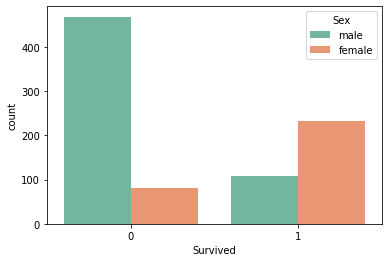

In [232]:
sns.countplot(x="Survived", hue='Sex', palette='Set2', data=df_train)

#### 男女（Survived分け）人数

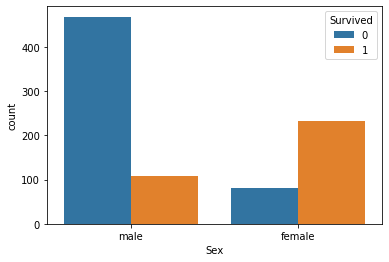

In [181]:
sns.countplot(x='Sex', hue='Survived', data=df_train)

Survivedの平均は。。。

In [182]:
df_train['Survived'].mean()

0.3838383838383838

---

男性のみのSurvivedの平均は。。。

In [183]:
df_train['Survived'].loc[df_train['Sex']=='male'].mean()

0.18890814558058924

---

女性のみのSUrvivedの平均は。。。

In [184]:
df_train['Survived'].loc[df_train['Sex']=='female'].mean()

0.7420382165605095

## 男性はたくさん死んでいて、女性はたくさん生き延びた

---

### Ageのヒストグラム

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([14., 10.,  6., 10.,  4.,  3.,  3.,  4.,  8.,  2.,  4.,  1.,  2.,
         6.,  6., 17., 13., 26., 25., 15., 25., 27., 15., 31., 24., 18.,
        18., 25., 22., 25., 19., 18., 17., 15., 19., 22.,  7., 11., 14.,
        13.,  8., 13.,  5.,  9., 12.,  5.,  9.,  9.,  6., 10.,  7.,  6.,
         1.,  8.,  2.,  5.,  2.,  5.,  2.,  4.,  3.,  4.,  2.,  2.,  3.,
         1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 0.42   ,  1.41475,  2.4095 ,  3.40425,  4.399  ,  5.39375,
         6.3885 ,  7.38325,  8.378  ,  9.37275, 10.3675 , 11.36225,
        12.357  , 13.35175, 14.3465 , 15.34125, 16.336  , 17.33075,
        18.3255 , 19.32025, 20.315  , 21.30975, 22.3045 , 23.29925,
        24.294  , 25.28875, 26.2835 , 27.27825, 28.273  , 29.26775,
        30.2625 , 31.25725, 32.252  , 33.24675, 34.2415 , 35.23625,
        36.231  , 37.22575, 38.2205 , 39.21525, 40.21   , 41.20475,
        42.1995 , 43.19425, 44.189  , 45.18375, 46.1785 , 47.17325

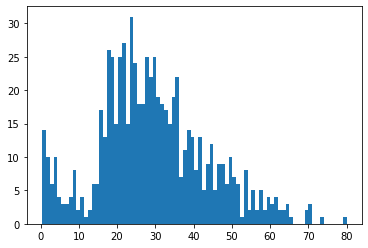

In [185]:
plt.hist(df_train['Age'], bins=80)

・12歳くらいまで非常に少ない

・そこから急激に大きくなり、22歳くらいをピークにだんだんと下がる

In [186]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

## Survived別でAgeの積み上げヒストグラム書いてみた

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


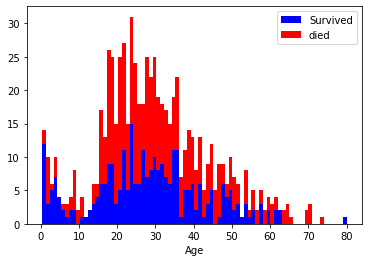

In [187]:
age_1 = df_train['Age'].loc[df_train['Survived']==1]
age_0 = df_train['Age'].loc[df_train['Survived']==0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([age_1, age_0], bins=80, color=['blue', 'red'], label=['Survived', 'died'], histtype='bar', stacked=True)
ax.set_xlabel('Age')
ax.legend()
fig.show()

・子供の生存率高い（特に18歳くらいまで）

## 性別別Age積み上げヒストグラム書いてみた

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


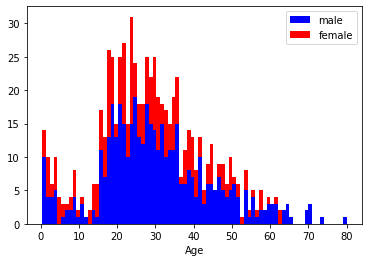

In [188]:
age_m = df_train['Age'].loc[df_train['Sex']=='male']
age_f = df_train['Age'].loc[df_train['Sex']=='female']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist([age_m, age_f], bins=80, color=['blue', 'red'], label=['male', 'female'], histtype='bar', stacked=True)
ax.set_xlabel('Age')
ax.legend()
fig.show()

65歳以降は男性のみ

---

### Pclass（性別分け）人数

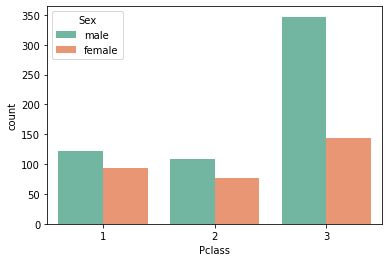

In [189]:
sns.countplot(x='Pclass', hue='Sex', palette='Set2', data=df_train)

### Pclass（生死分け）人数

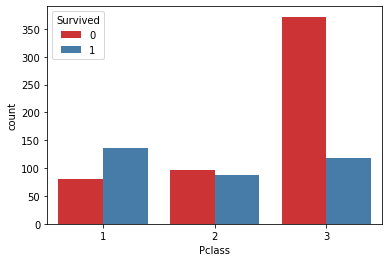

In [190]:
sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=df_train)

In [191]:
df_train['Survived'].mean()

0.3838383838383838

In [192]:
df_train['Survived'].loc[df_train['Pclass']==1].mean()

0.6296296296296297

In [193]:
df_train['Survived'].loc[df_train['Pclass']==2].mean()

0.47282608695652173

In [194]:
df_train['Survived'].loc[df_train['Pclass']==3].mean()

0.24236252545824846

## Pclassが高くなるにつれて生き延びた人が少なくなっている

---

# Ageが欠損しているデータとしていないデータの違いを見てみよう 

### `df_train_null`にAgeが欠損しているデータを収納

In [195]:
df_train_null = df_train[df_train['Age'].isnull()]
df_train_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [196]:
df_train_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  177 non-null    int64  
 1   Survived     177 non-null    int64  
 2   Pclass       177 non-null    int64  
 3   Name         177 non-null    object 
 4   Sex          177 non-null    object 
 5   Age          0 non-null      float64
 6   SibSp        177 non-null    int64  
 7   Parch        177 non-null    int64  
 8   Ticket       177 non-null    object 
 9   Fare         177 non-null    float64
 10  Cabin        19 non-null     object 
 11  Embarked     177 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB


### df_train_notnullにAgeが欠損していないデータを収納

In [197]:
df_train_notnull = df_train[~df_train['Age'].isnull()]
df_train_notnull.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
df_train_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


---

## 欠損の有無でSurvivedに変化があるかの確認

##### Ageが欠損していない人のSurvived

In [199]:
df_train_notnull['Survived'].mean()

0.4061624649859944

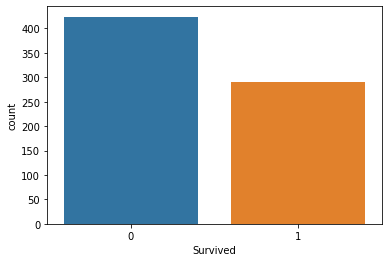

In [200]:
sns.countplot(x='Survived', data=df_train_notnull)

##### Ageが欠損している人のSurvived

In [201]:
df_train_null['Survived'].mean()

0.2937853107344633

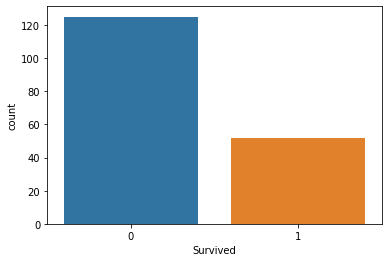

In [202]:
sns.countplot(x='Survived', data=df_train_null)

Ageが欠損している人たちは、していない人たちよりも**死ぬ確率が高い**

---

## 欠損の有無で性別の割合に変化があるかの確認

In [203]:
df_train_notnull['Sex'].value_counts()

male      453
female    261
Name: Sex, dtype: int64

In [204]:
453*100/714

63.445378151260506

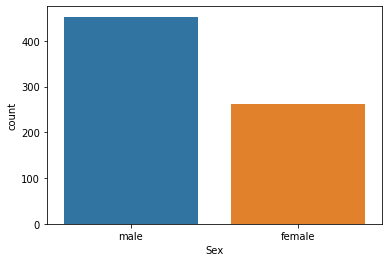

In [205]:
sns.countplot(x='Sex', data=df_train_notnull)

In [206]:
df_train_null['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [207]:
124*100/177

70.05649717514125

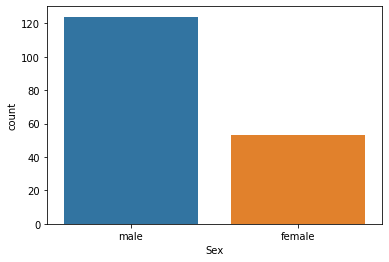

In [208]:
sns.countplot(x='Sex', data=df_train_null)

欠損しているデータは少し**男性の方が多い**

---

In [209]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [211]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### SibSpとParchのヒストグラムを見てみる

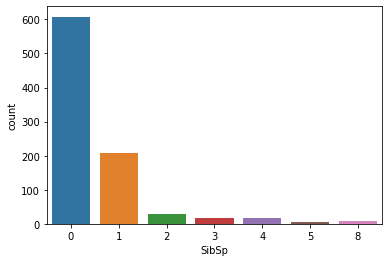

In [212]:
sns.countplot(df_train['SibSp'])

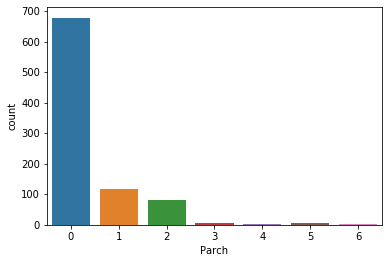

In [213]:
sns.countplot(df_train['Parch'])

#### SibSpもParchも同じような分布!

## Survived別のヒストグラム

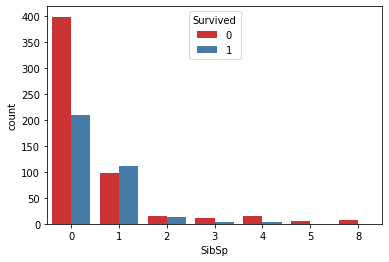

In [230]:
sns.countplot(x='SibSp', hue='Survived', data=df_train, palette='Set1')

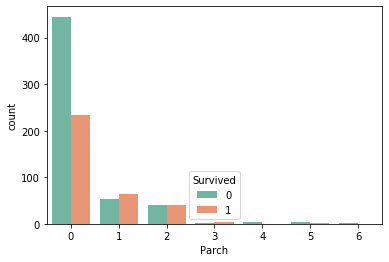

In [231]:
sns.countplot(x='Parch', hue='Survived', data=df_train, palette='Set2')

### 大体同じ分布！
### 特に一人で来ている人は死んでいる確率高い！！！

---

## SibSpとParchの合計（身内で何人で来ているか）のRelationを作成

In [221]:
df_train1 = df_train.assign(Relation = df_train['Parch'] + df_train['SibSp'])

In [223]:
df_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [224]:
df_train1['Relation'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Relation, dtype: int64

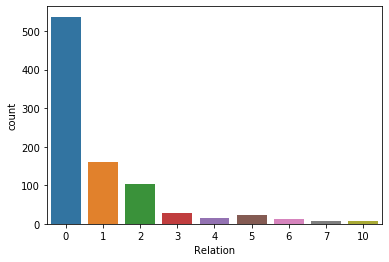

In [226]:
sns.countplot(df_train1['Relation'])

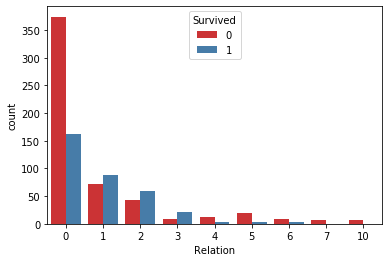

In [228]:
sns.countplot(x='Relation', hue='Survived', data=df_train1, palette='Set1')

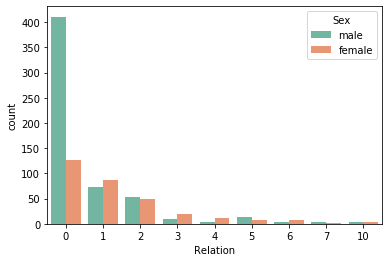

In [229]:
sns.countplot(x='Relation', hue='Sex', data=df_train1, palette='Set2')

In [233]:
new_Sex = df_train.Sex.replace({'male':1, 'female':0}).astype(int)

In [234]:
df_train['Sex'] = new_Sex
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


# Nameを見るとその人の性別と子供かどうかがわかる
Mr:大人の男性　Mrs.:既婚女性　Miss.:未婚女性　Major:?　Master:? Jonkheer:? Don:?

In [ ]:
df_train['Name'].unique()

# Mr.さん

In [ ]:
df_Mr = df_train[df_train['Name'].str.contains('Mr\.')]
df_Mr['Sex'].value_counts()

In [ ]:
df_Mr['Age'].mean()

In [ ]:
df_Mr

In [ ]:
df_Mr_agenull = df_Mr[df_Mr['Age'].isnull()]
df_Mr_agenull

# Mrs.さん

In [ ]:
df_Mrs = df_train[df_train['Name'].str.contains('Mrs.')]
df_Mrs['Sex'].value_counts()

In [ ]:
df_Mrs['Age'].mean()

In [ ]:
df_Mrs.head()

In [ ]:
df_Mrs_agenull = df_Mrs[df_Mrs['Age'].isnull()]
df_Mrs_agenull

# Missさん

In [ ]:
df_Miss = df_train[df_train['Name'].str.contains('Miss.')]
df_Miss['Sex'].value_counts()

In [ ]:
df_Miss.head()

In [ ]:
df_Miss['Age'].mean()

# Mr. Miss. Mrs. さん以外

In [ ]:
df_M = df_train[~((df_train['Name'].str.contains('Mr.')) | (df_train['Name'].str.contains('Mrs.')) | (df_train['Name'].str.contains('Miss')))]
df_M['Name'].unique()

# Majorさん

In [ ]:
df_Major = df_train[df_train['Name'].str.contains('Major')]
df_Major.head()

# Masterさん
男の子の子供

In [ ]:
df_Master = df_train[df_train['Name'].str.contains('Master.')]
df_Master['Sex'].value_counts()

In [ ]:
df_Master['Age'].mean()

# Jonkheerさん
オランダとベルギーで使われる貴族

In [ ]:
df_Jonkheer = df_train[df_train['Name'].str.contains('Jonkheer')]
df_Jonkheer

# Donさん
スペイン人男性

In [ ]:
df_Don = df_train[df_train['Name'].str.contains('Don\.')]
df_Don

# Ms.さん
未婚女性、もしくは既婚未婚がわからない女性

In [ ]:
df_Ms = df_train[df_train['Name'].str.contains('Ms\.')]
df_Ms

# Dr.さん
医者

In [ ]:
df_Dr = df_train[df_train['Name'].str.contains('Dr\.')]
df_Dr

# Col.さん
陸軍の大佐

In [ ]:
df_Col = df_train[df_train['Name'].str.contains('Col\.')]
df_Col

# Rev.さん
牧師

In [ ]:
df_Rev = df_train[df_train['Name'].str.contains('Rev\.')]
df_Rev

# Countessさん
伯爵女性

In [ ]:
df_Countess = df_train[df_train['Name'].str.contains('Countess\.')]
df_Countess

# Mme.さん
フランス既婚女性

In [ ]:
df_Mme = df_train[df_train['Name'].str.contains('Mme\.')]
df_Mme

# Capt.さん
船長　大佐　キャプテン

In [ ]:
df_Capt = df_train[df_train['Name'].str.contains('Capt\.')]
df_Capt

# Mlle.さん
フランスお嬢様

In [ ]:
df_Mlle = df_train[df_train['Name'].str.contains('Mlle\.')]
df_Mlle

# 各種Describre

In [ ]:
df_Mr.describe()

In [ ]:
df_Mrs.describe()

In [ ]:
df_Miss.describe()

In [ ]:
df_Master.describe()

In [ ]:
df_agenull.describe()

In [ ]:
df_train['Cabin'].value_counts()

In [ ]:
df_train['Cabin'].unique()

In [ ]:
df_train[df_train['Cabin']=='G6']

In [ ]:
df_train[df_train['Cabin']=='B96 B98']

In [ ]:
df_train[df_train['Cabin']=='C23 C25 C27']

In [ ]:
df_train['Ticket'].unique()

In [ ]:
df_train['Ticket'].value_counts()

In [ ]:
df_train['SibSp'].value_counts()

In [ ]:
df_train['Parch'].value_counts()

In [ ]:
plt.hist(df_train['Fare'], histtype='bar', bins=40)
plt.title('Fare_hist')
plt.show()

In [ ]:
df_train['Ticket'].value_counts()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_train['Embarked'].value_counts()
#タイタニックの経路S、C、Q

In [ ]:
#df_train['Embarked'].fillna(lambda x: random.choice(df[df['Embarked'] != np.nan]["Embarked"]), inplace =True)
#df_train.isnull().sum()

In [ ]:
df_relation = df_train[(df_train['SibSp']>1) & (df_train['Parch']>1)]
df_relation.count()